In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("/Users/himkantnigam/Downloads/STUDY /Data Science Revised R_27.07.21/Data Science Projects 23 - Employee Attrition/attrition/attrition.csv")

In [3]:
df.head()

,Age,Attrition,BusinessTravel,Department,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobSatisfaction,MaritalStatus,MonthlyIncome,OverTime,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,DistanceFromHome
0,41,1,Travel_Rarely,Sales,Life Sciences,2,Female,3,2,4,Single,5993,Yes,8,1,6,4,0,5,1
1,49,0,Travel_Frequently,Research & Development,Life Sciences,3,Male,2,2,2,Married,5130,No,10,3,10,7,1,7,8
2,37,1,Travel_Rarely,Research & Development,Other,4,Male,2,1,3,Single,2090,Yes,7,3,0,0,0,0,2
3,33,0,Travel_Frequently,Research & Development,Life Sciences,4,Female,3,1,3,Married,2909,Yes,8,3,8,7,3,0,3
4,27,0,Travel_Rarely,Research & Development,Medical,1,Male,3,1,2,Married,3468,No,6,3,2,2,2,2,2


In [4]:
df.describe()

,Age,Attrition,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,DistanceFromHome
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,2.721769,2.729932,2.063946,2.728571,6502.931293,11.279592,2.761224,7.008163,4.229252,2.187755,4.123129,9.192517
std,9.135373,0.367863,1.093082,0.711561,1.106940,1.102846,4707.956783,7.780782,0.706476,6.126525,3.623137,3.222430,3.568136,8.106864
min,18.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,30.000000,0.000000,2.000000,2.000000,1.000000,2.000000,2911.000000,6.000000,2.000000,3.000000,2.000000,0.000000,2.000000,2.000000
50%,36.000000,0.000000,3.000000,3.000000,2.000000,3.000000,4919.000000,10.000000,3.000000,5.000000,3.000000,1.000000,3.000000,7.000000
75%,43.000000,0.000000,4.000000,3.000000,3.000000,4.000000,8379.000000,15.000000,3.000000,9.000000,7.000000,3.000000,7.000000,14.000000
max,60.000000,1.000000,4.000000,4.000000,5.000000,4.000000,19999.000000,40.000000,4.000000,40.000000,18.000000,15.000000,17.000000,29.000000


- There is no missing data since each column has equal number of rows.

In [5]:
#checking for duplicated data
np.sum(df.duplicated())

0

In [6]:
#checking number of unique values for each column
df.nunique()

Age                          43
Attrition                     2
BusinessTravel                3
Department                    3
EducationField                6
EnvironmentSatisfaction       4
Gender                        2
JobInvolvement                4
JobLevel                      5
JobSatisfaction               4
MaritalStatus                 3
MonthlyIncome              1349
OverTime                      2
TotalWorkingYears            40
WorkLifeBalance               4
YearsAtCompany               37
YearsInCurrentRole           19
YearsSinceLastPromotion      16
YearsWithCurrManager         18
DistanceFromHome             29
dtype: int64

In [7]:
#checking for null values
np.sum(df.isnull())

Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
EducationField             0
EnvironmentSatisfaction    0
Gender                     0
JobInvolvement             0
JobLevel                   0
JobSatisfaction            0
MaritalStatus              0
MonthlyIncome              0
OverTime                   0
TotalWorkingYears          0
WorkLifeBalance            0
YearsAtCompany             0
YearsInCurrentRole         0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
DistanceFromHome           0
dtype: int64

# UNIVARIATE ANALYSIS

## Categorical Values

### "Business Travel" is a journey specifically taken for work purposes and doesn't include daily commutes, leisure trips or holidays. 
### According to the WTO (World Trade Organisation) around 30 per cent of international trips these days are for business – and business travel shows no sign of slowing down.

In [8]:
buss_travel=pd.crosstab(df.BusinessTravel,columns="Count")
buss_travel

col_0,Count
BusinessTravel,
Non-Travel,150
Travel_Frequently,277
Travel_Rarely,1043


In [9]:
label_travel=["Non-Travel","Travel_Frequently","Travel_Rarely"]
value_travel=[150,277,1043]

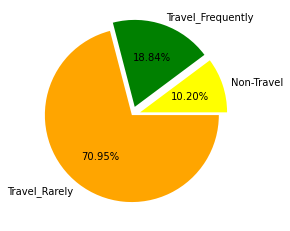

In [10]:
plt.pie(value_travel,labels=label_travel,autopct="%0.2F%%",colors=["Yellow","Green","Orange"],explode=[0.1,0.1,0])
plt.show()

- So we can say that that 70% people travelled rarely while almost 10% of the employees did not travel at all and atmost 19% of the people travelled frequently.

### "Department" is a division of a large organization such as a government, university, or business, dealing with a specific area of activity.

In [11]:
dept=pd.crosstab(df.Department,columns="Count")
dept

col_0,Count
Department,
Human Resources,63
Research & Development,961
Sales,446


In [12]:
value_dept=[63,961,446]
label_dept=["Human Resources","Research & Development","Sales"]

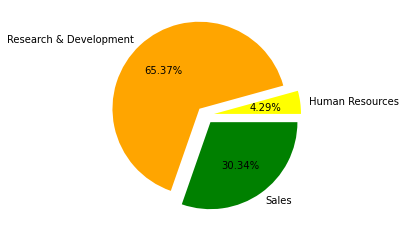

In [13]:
plt.pie(value_dept,labels=label_dept,explode=[0.1,0.1,0.1],autopct="%0.2f%%",colors=["Yellow","Orange","Green"])
plt.show()

- We can say that R&D has maximum employees
- We can say that Human resources has minimum employees
- Roughly we can say that Sales has around 30% employees, R&D has around 65% employees and Human Resources has around 4%.

### "Education Field" is a broad domain, branch or area of content covered by an educational programme, course or module.

#### edu=pd.crosstab(df.EducationField,columns="Count")
edu

In [14]:
value_edu=[27,606,159,464,82,132]
label_edu=["Human Resources","Life Sciences","Marketing","Medical","Other","Technical Degree"]

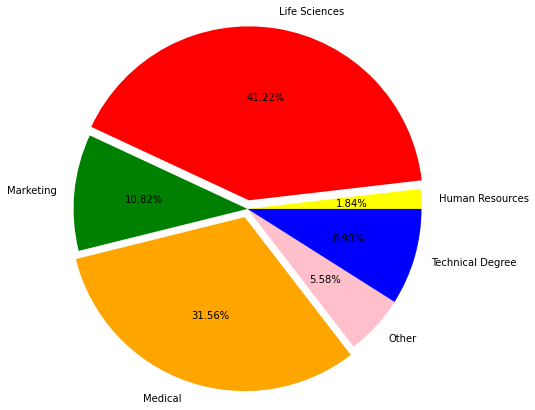

In [15]:
plt.pie(value_edu,labels=label_edu,colors=["Yellow","Red","Green","Orange","Pink","Blue"],explode=[0,0.1,0,0.1,0,0],autopct="%0.2f%%",radius=2)
plt.show()

- We can say that maximum employees are from Life Science educational background (41.22%)
- We can say that least employees are from Human Resources educational background (1.84%)
- Second highest number of employees are from Medical background.
- Third highest number of employees are from Marketing background.
- There are 8.98% employees are from Technical background.
- 5.58% of employees are from other fields.

### "Gender" is the range of characteristics pertaining to femininity and masculinity and differentiating them.

In [16]:
sex=pd.crosstab(df.Gender,columns="Count")
sex

col_0,Count
Gender,
Female,588
Male,882


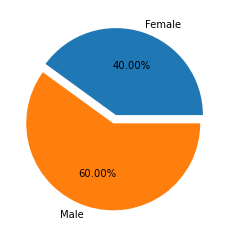

In [17]:
value_sex=[588,882]
lable_sex=["Female","Male"]
plt.pie(value_sex,labels=lable_sex,autopct="%0.2f%%",explode=[0,0.1])
plt.show()

- We can say that employees have Male to Female ratio of 6:4

### "Marital Status" is the state of being married or not married —used on official forms to ask if a person is married, single or divorced.

In [18]:
status=pd.crosstab(df.MaritalStatus,columns="Count")
status

col_0,Count
MaritalStatus,
Divorced,327
Married,673
Single,470


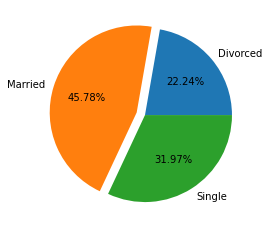

In [19]:
value_status=[327,673,470]
label_status=["Divorced","Married","Single"]
plt.pie(value_status,labels=label_status,autopct="%0.2f%%",explode=[0,0.1,0])
plt.show()

- We can say that maximum employees fall under married category(45.78%)
- After Married, most of the employees are single(31.97%)
- Least number of employees fall under Divorced category(22.24%)

### "Overtime" is the amount of time someone works beyond normal working hours. The term is also used for the pay received for this time.

In [20]:
overtime=pd.crosstab(df.OverTime,columns="count")
overtime

col_0,count
OverTime,
No,1054
Yes,416


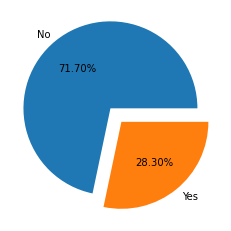

In [21]:
value_overtime=[1054,416]
label_overtime=["No","Yes"]
plt.pie(value_overtime,labels=label_overtime,autopct="%0.2f%%",explode=[0.1,0.1])
plt.show()

- We can say that more than 70% of employees did not work overtime.
- 28.3% of employees have worked overtime.
- We can see its correlation with gender and status to get specific category of who did overtime.

## Discrete Values

### "Attrition" is the departure of employees from the organization for any reason (voluntary or involuntary), including resignation, termination, death or retirement.

In [22]:
attrition=pd.crosstab(df.Attrition,columns="Count")
attrition

col_0,Count
Attrition,
0,1233
1,237


0 - Working Employees
1 - left

In [23]:
label_attr=["Working","Left"]
val_attr=[1233,237]

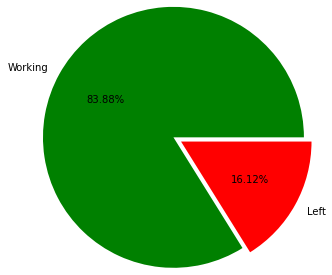

In [24]:
#plt.axis("equal")
plt.pie(val_attr,labels=label_attr,radius=1.5,autopct="%0.2f%%",colors=["Green","Red"],explode=[0.1,0],startangle=360)
plt.show()

- Roughly we can say that more than 4/5th of the employees are working and less than 1/5th of the employees have left the company. 

### "Environmental satisfaction" refers to how contented a person feels with respect to the physical setting in question.
### The working environment is one of the most crucial factors which influence the level of satisfaction as well as motivation of its employees.
### There can be many factors that affect environmental satisfaction like Hygiene Factors, commute hours, Location, Travel, etc.


In [25]:
env_sat=pd.crosstab(df.EnvironmentSatisfaction,columns="Count")
env_sat

col_0,Count
EnvironmentSatisfaction,
1,284
2,287
3,453
4,446


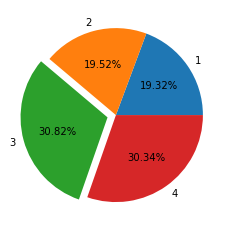

In [26]:
value_env=[284,287,453,446]
label_env=["1","2","3","4"]
plt.pie(value_env,labels=label_env,autopct="%0.2f%%",explode=[0,0,0.1,0])
plt.show()

- We can say that 30.34% employees are **highly satisfied** by the work environment.
- We can say that 19.52% employees are **highly dis-satisfied** by the work environment.
- We can say that 30.82% employees are **satisfied** by the work environment.
- We can say that 19.32% employees are **dis-satisfied** by the work environment.

### "work-life balance" involves the minimization of work-related stress, and the establishing of a stable and sustainable way to work while maintaining health and general well-being. 

In [27]:
worklife=pd.crosstab(df.WorkLifeBalance,columns="count")
worklife

col_0,count
WorkLifeBalance,
1,80
2,344
3,893
4,153


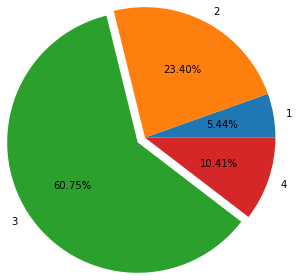

In [28]:
value_worklife=[80,344,893,153]
label_worklife=[1,2,3,4]
plt.pie(value_worklife,labels=label_worklife,autopct="%0.2f%%",explode=[0,0,0.1,0],radius=1.5)
plt.show()

- We can say that 5.44% employees have least work life balance.
- we can say that 60.75% employees have work life balance of 3 on a scale of 1-4
- Only 10.74% of employees have work life balance of 4 on a scale of 1-4
- 23.44% of employees have work life balance of 2 on a scale of 1-4

### "Job Involvement" refers to the psychological and emotional extent to which someone participates in his/her work, profession, and company. 
### Showing up to work on time is half the battle. Top performers are engaged in their work and have high job involvement.

In [29]:
jobinv=pd.crosstab(df.JobInvolvement,columns="Count")
jobinv

col_0,Count
JobInvolvement,
1,83
2,375
3,868
4,144


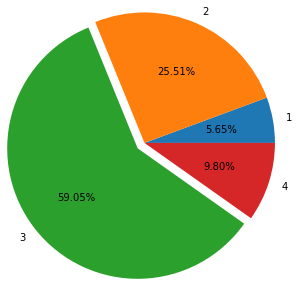

In [30]:
value_jobinv=[83,375,868,144]
label_jobinv=[1,2,3,4]
plt.pie(value_jobinv,labels=label_jobinv,autopct="%0.2f%%",explode=[0,0,0.1,0],radius=1.5)
plt.show()

- 9.8% employees are involved in their jobs at a score of 4 in a scale of 1 to 4.
- 59.05% employees are involved in their jobs at a score of 3 in a scale of 1 to 4.
- 25.51% employees are involved in their jobs at a score of 2 in a scale of 1 to 4.
- 5.65% employees are involved in their jobs at a score of 1 in a scale of 1 to 4.
- We can say that almost 70% employees are involved in their job roles.

### Job levels are categories of authority in an organization. Each level is typically associated with a salary range and a series of job titles. Jobs levels can be grouped into five areas: executive management, middle management, management, advisors and employees.

In [31]:
joblvl=pd.crosstab(df.JobLevel,columns="Count")
joblvl

col_0,Count
JobLevel,
1,543
2,534
3,218
4,106
5,69


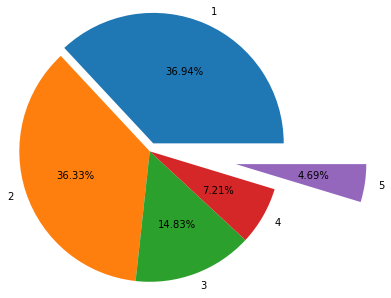

In [32]:
value_joblvl=[543,534,218,106,69]
label_joblvl=[1,2,3,4,5]
plt.pie(value_joblvl,labels=label_joblvl,autopct="%0.2f%%",explode=[0.1,0,0,0,1],radius=1.5)
plt.show()

- maximum employees are at the very initial level of 1(36.94%)
- least employees are the top level of 5(4.69%)
- around 73.5% of employees are at the 2 initial level
- around 12% of employees are in the top 2 levels of 4 and 5

### Job satisfaction is defined as the extent to which an employee feels self-motivated, content & satisfied with his/her job. 

In [33]:
jobsat=pd.crosstab(df.JobSatisfaction,columns="Count")
jobsat

col_0,Count
JobSatisfaction,
1,289
2,280
3,442
4,459


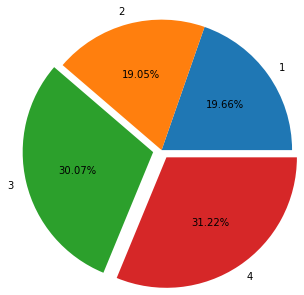

In [34]:
value_jobsats=[289,280,442,459]
label_jobsats=[1,2,3,4]
plt.pie(value_jobsats,labels=label_jobsats,autopct="%0.2f%%",explode=[0,0,0.1,0.1],radius=1.5)
plt.show()

- 31.22% employees have job satisfaction of scale 4 on a sacle of 1 to 4.
- 30.07% employees have job satisfaction of scale 3 on a sacle of 1 to 4.
- 19.05% employees have job satisfaction of scale 2 on a sacle of 1 to 4.
- 19.66% employees have job satisfaction of scale 1 on a sacle of 1 to 4.
- Atmost 62% employees have higher job satisfaction than others.

In [35]:
data=df[['Attrition','BusinessTravel','Department','EducationField',
       'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MaritalStatus', 'OverTime','WorkLifeBalance']]

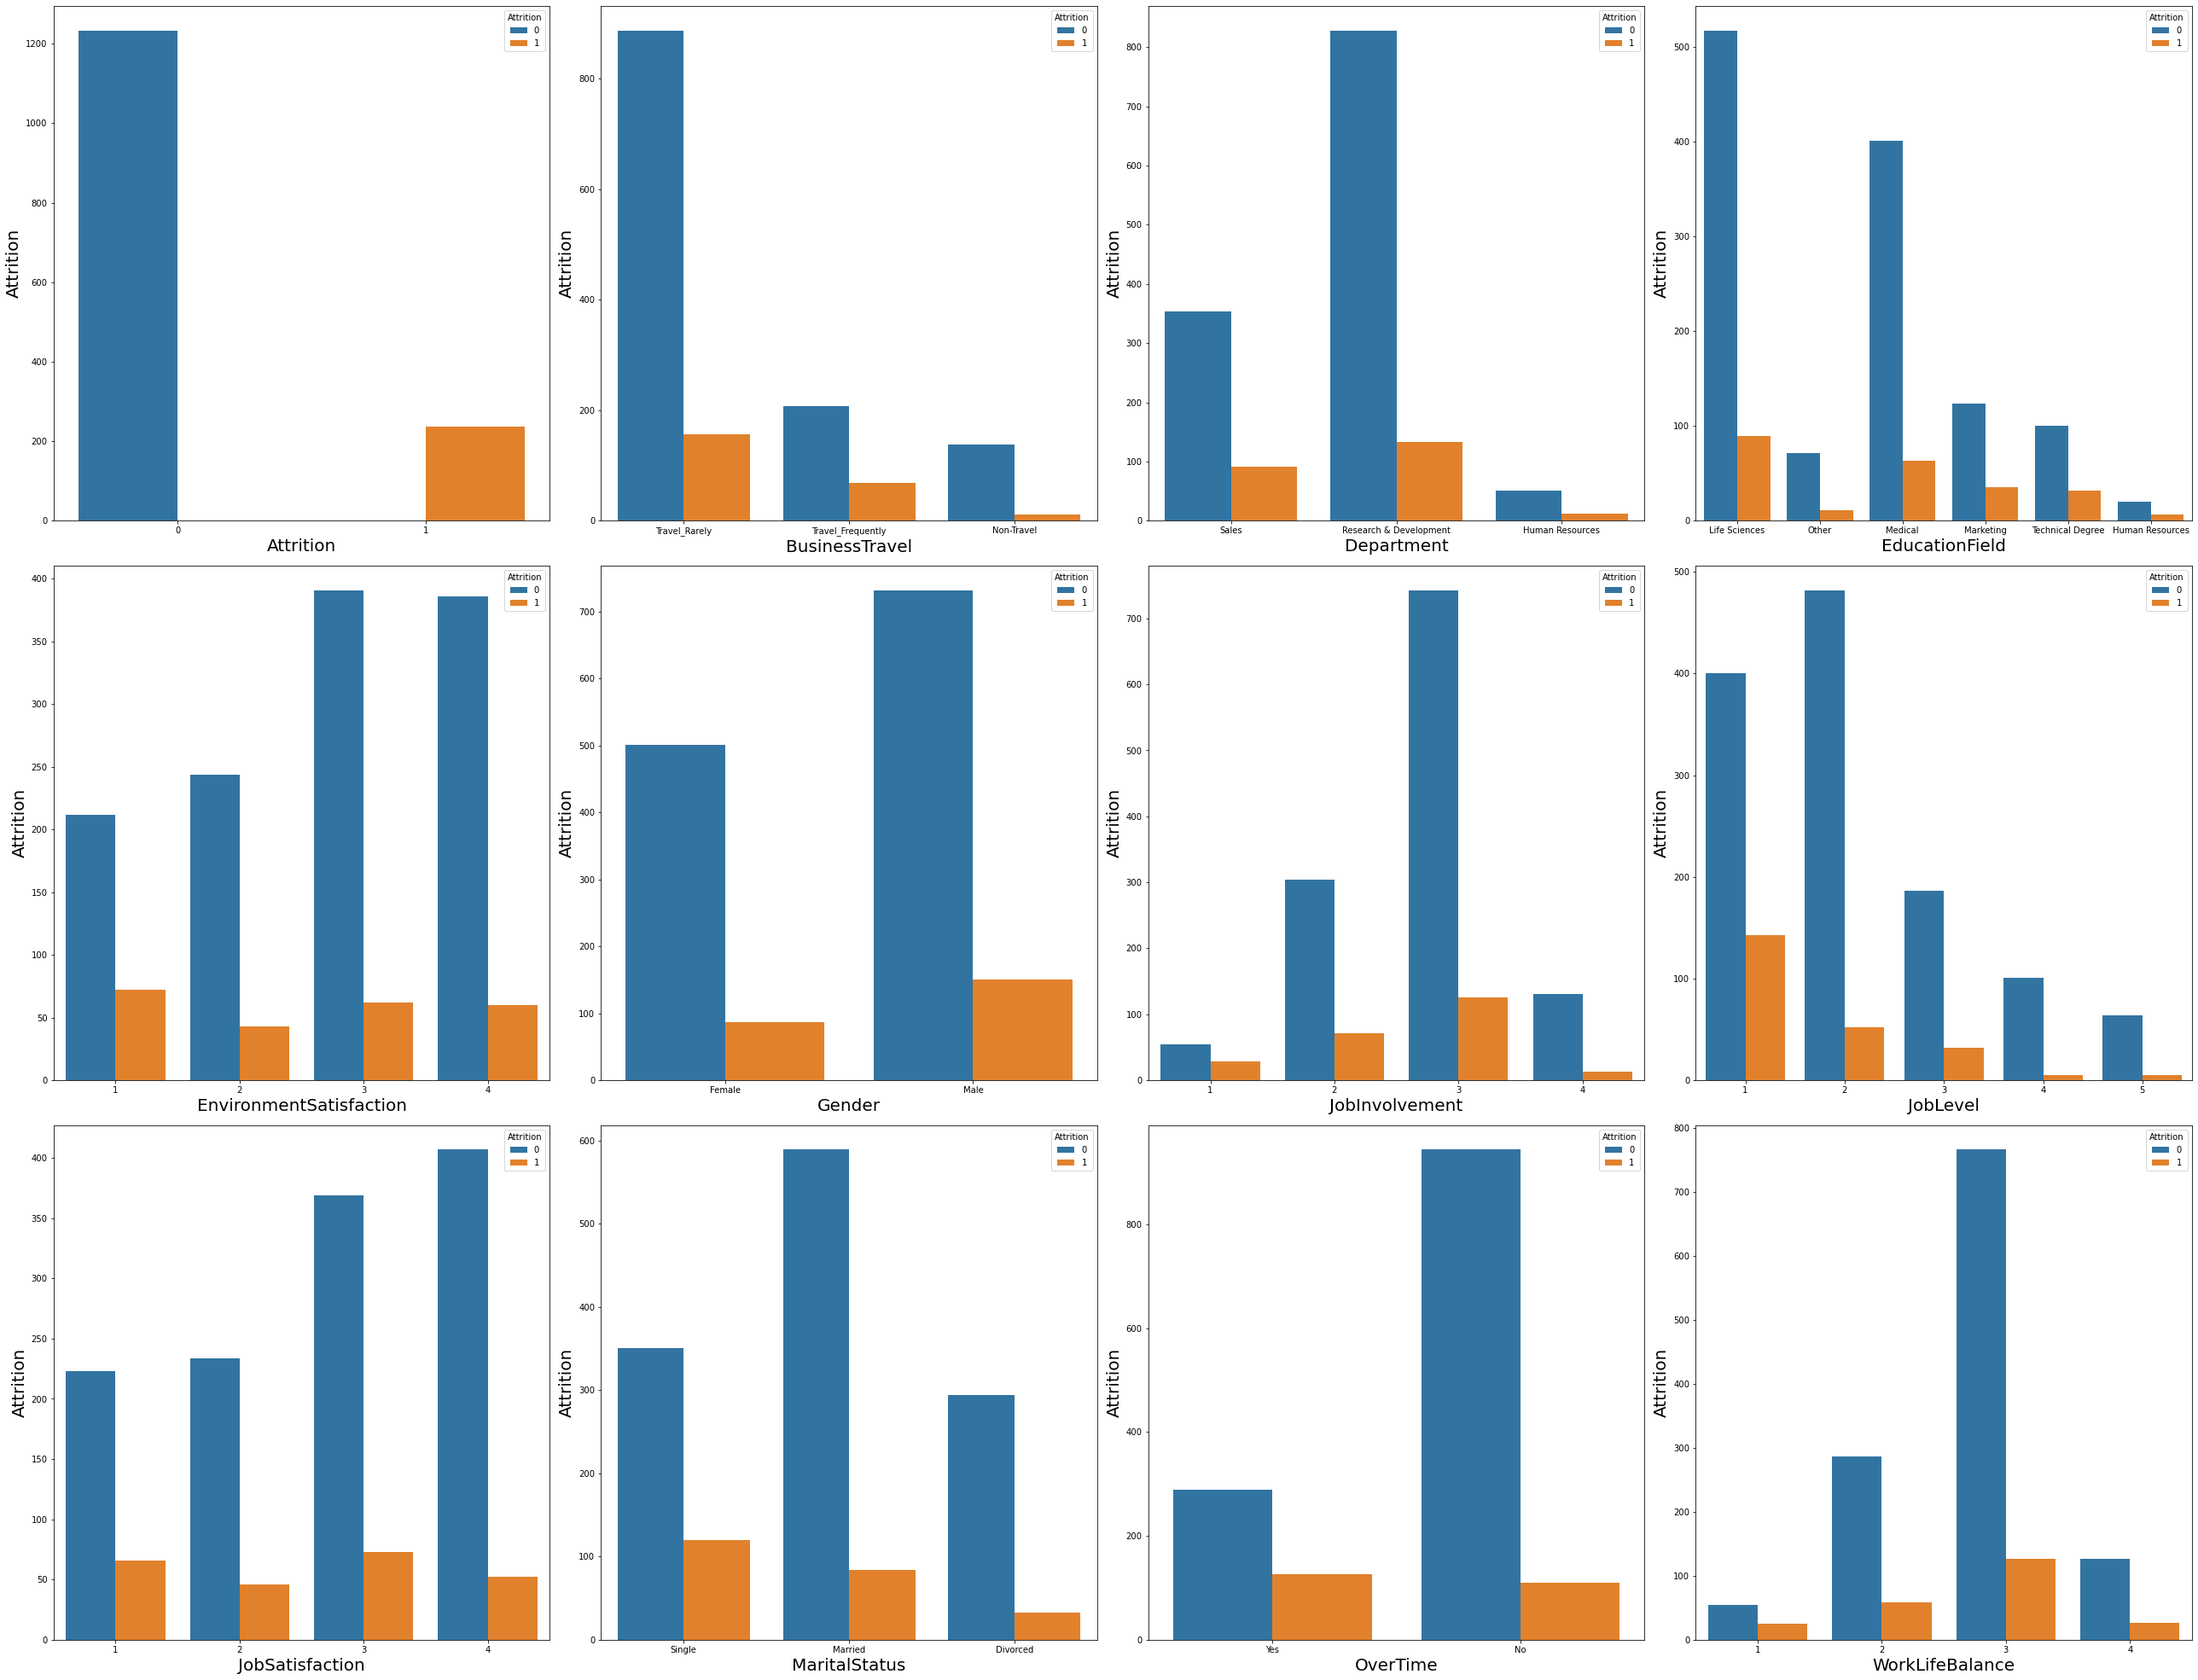

In [36]:
# Plotting how every  categorical feature correlate with the "target"
plt.figure(figsize=(36,36), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=16 :
        ax = plt.subplot(4,4,plotnumber)
        sns.countplot(x=data[column].dropna(axis=0)
                        ,hue=data.Attrition)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Attrition',fontsize=20)
    plotnumber+=1
plt.tight_layout()

## Continuous Variables

### "Age" is defined as the time a person has lived(here in years) 

In [37]:
df.Age.describe()

count    1470.000000
mean       36.923810
std         9.135373
min        18.000000
25%        30.000000
50%        36.000000
75%        43.000000
max        60.000000
Name: Age, dtype: float64

In [38]:
df.Age.mode()

0    35
dtype: int64

- Youngest employee is of the age 18 in data under observation.
- Oldest employee is of the age 60 in data under observation.
- Half of the employees(735) are less than 36 years of age in data under observation.
- Only 25% employees(approx 363) are more than 43 years of age in data under observation.
- Age data under observation is positive skewed.
- Half of the employees(735) lie in the age between 30 and 46 in data under observation.
- Since the difference between (Q1 ~ Q2) and (Q2 ~ Q3) is not equal, the given data is not symmetric.
- Range of age lies between 18 and 60 in the given dataset.
- maximum repeating age of employees is 35 as per given data.

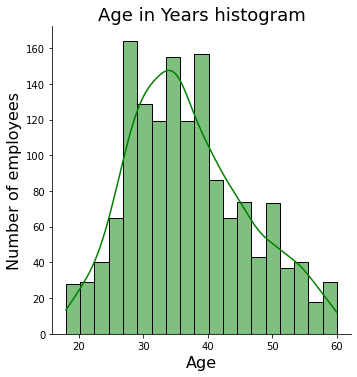

In [39]:
sns.displot(df.Age,color="Green",kde=True)
plt.title('Age in Years histogram', fontsize=18)
plt.xlabel('Age', fontsize=16)
plt.ylabel('Number of employees', fontsize=16)
plt.show()

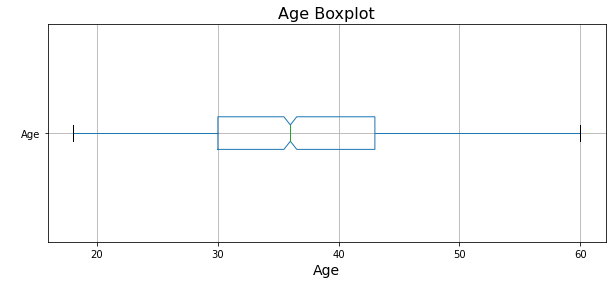

In [40]:
df.boxplot("Age",grid=True,figsize=(10,4),vert=False,notch=True)

plt.xlabel("Age",fontsize=14)
plt.ylabel(" ")
plt.title("Age Boxplot",fontsize=16)

plt.show()

- We can say that there is no outlier in the given data for Age attribute. 

### Monthly income means the gross countable income received or projected to be received during the month or the monthly equivalent.

In [41]:
df.MonthlyIncome.describe()

count     1470.000000
mean      6502.931293
std       4707.956783
min       1009.000000
25%       2911.000000
50%       4919.000000
75%       8379.000000
max      19999.000000
Name: MonthlyIncome, dtype: float64

In [42]:
np.quantile(df.MonthlyIncome,0.66)

6456.720000000001

In [43]:
df.MonthlyIncome.mode()

0    2342
dtype: int64

- we can say that maximum salary is 19999 INR as per given data. 
- we can say that minimum salary is 1009 INR as per given data.
- we can say that 25% employees(roughly 368 employees) have salary less than 2911 INR as per given data.
- we can say that 25% employees(roughly 368 employees) have salary more than 8379 INR as per given data.
- we can say that 50% employees(735 employees) have salary less than 4919 INR as per given data.
- we can say that 50% employees(735 employees) have salary between 2911 INR and 8379 INR as per given data.
- we can say that 25% employees(roughly 368 employees) have salary between 2911 INR and 4919 INR as per given data.
- we can say that 25% employees(roughly 368 employees) have salary between 8379 INR and 4919 INR as per given data.
- we can say that average salary of employees is 6503 INR(approx) as per given data.
- we can say that salary salary data under obervation is positive skewed since mean value is greater than median.
- Since the difference between (Q1 ~ Q2) and (Q2 ~ Q3) is not equal, the given salary data is not symmetric.
- Range of age lies between 1009 INR and 19999 INR in the given dataset.
- maximum repeating salary of employees is 2342 INR as per given data.

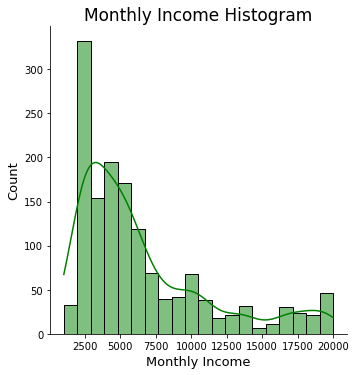

In [44]:
sns.displot(df.MonthlyIncome,color="green",kde=True)

plt.xlabel("Monthly Income",fontsize=13)
plt.ylabel("Count",fontsize=13)
plt.title("Monthly Income Histogram",fontsize=17)

plt.show()

- From the histogram we can see that a great number of employees have salary between 2000 and 7500.

In [45]:
a=df.MonthlyIncome[df.MonthlyIncome>8379].count()
a

368

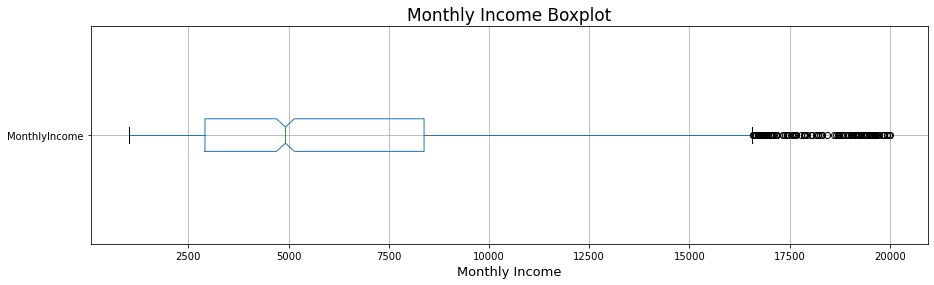

In [46]:
df.boxplot("MonthlyIncome",vert=False,notch=True,figsize=(15,4))

plt.xlabel("Monthly Income",fontsize=13)
plt.title("Monthly Income Boxplot",fontsize=17)

plt.show()


### Total Working Years refers to the total number of years an employee has worked in one or more companies. 

In [47]:
df.TotalWorkingYears.describe()

count    1470.000000
mean       11.279592
std         7.780782
min         0.000000
25%         6.000000
50%        10.000000
75%        15.000000
max        40.000000
Name: TotalWorkingYears, dtype: float64

In [48]:
df.TotalWorkingYears.mode()

0    10
dtype: int64

- we can say that maximum value of Total Working Years is 40 years as per given data. 
- we can say that minimum value of Total Working Years is 0 years as per given data.
- we can say that 25% employees(roughly 368 employees) have Total Working Years less than 6 years as per given data.
- we can say that 25% employees(roughly 368 employees) have Total Working Years more than 15 years as per given data.
- we can say that 50% employees(735 employees) have Total Working Years less than 10 years as per given data.
- we can say that 50% employees(735 employees) have Total Working Years between 6 years and 15 years as per given data.
- we can say that 25% employees(roughly 368 employees) have Total Working Years between 6 years and 10 years as per given data.
- we can say that 25% employees(roughly 368 employees) have Total Working Years between 10 years and 15 years as per given data.
- we can say that average salary of employees is 11.28 years(approx) as per given data.
- we can say that Total Working Years data under obervation is positive skewed since mean value is greater than median.
- Since the difference between (Q1 ~ Q2) and (Q2 ~ Q3) is not equal, the given Total Working Years data is not symmetric.
- Range of Total Working Years lies between 0 years and 40 years in the given dataset.
- maximum repeating Total Working Years of employees is 10 years as per given data.

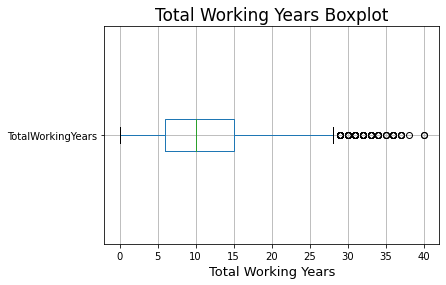

In [49]:
df.boxplot("TotalWorkingYears",vert=False)

plt.xlabel("Total Working Years",fontsize=13)
plt.title("Total Working Years Boxplot",fontsize=17)

plt.show()

- From observing boxplot we can conclude that there are outliers present in the given data set plotted for Total Working Years.

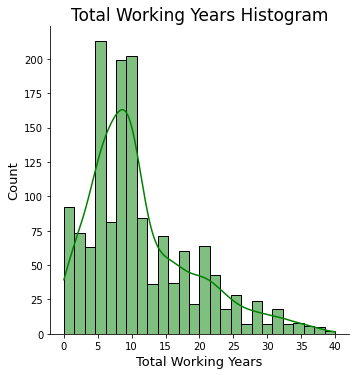

In [50]:
sns.displot(df.TotalWorkingYears,color="Green",kde=True)

plt.xlabel("Total Working Years",fontsize=13)
plt.ylabel("Count",fontsize=13)
plt.title("Total Working Years Histogram",fontsize=17)

plt.show()

- From observing histogram we can see that Total Working Years has positive skewed data.

### Years At Company defines the number of years an employee has been working or employed in the same company.

In [51]:
df.YearsAtCompany.describe()

count    1470.000000
mean        7.008163
std         6.126525
min         0.000000
25%         3.000000
50%         5.000000
75%         9.000000
max        40.000000
Name: YearsAtCompany, dtype: float64

In [52]:
df.YearsAtCompany.mode()

0    5
dtype: int64

- we can say that maximum value of Years At Company is 40 years as per given data. 
- we can say that minimum value of Years At Company timeframe is 0 years as per given data.
- we can say that 25% employees(roughly 368 employees) have Years At Company timeframe less than 3 years as per given data.
- we can say that 25% employees(roughly 368 employees) have Years At Company timeframe more than 9 years as per given data.
- we can say that 50% employees(735 employees) have Years At Company timeframe less than 5 years as per given data.
- we can say that 50% employees(735 employees) have Years At Company timeframe between 3 years and 5 years as per given data.
- we can say that 25% employees(roughly 368 employees) have Years At Company timeframe between 3 years and 5 years as per given data.
- we can say that 25% employees(roughly 368 employees) have Years At Company timeframe between 5 years and 9 years as per given data.
- we can say that average Years At Company timeframe of employees is 7.1 years(approx) as per given data.
- we can say that Years At Company timeframe data under obervation is positive skewed since mean value is greater than median.
- Since the difference between (Q1 ~ Q2) and (Q2 ~ Q3) is not equal, the given Years At Company data is not symmetric.
- Range of Years At Company timeframe lies between 0 years and 40 years in the given dataset.
- maximum repeating Years At Company timeframe of employees is 5 years as per given data.

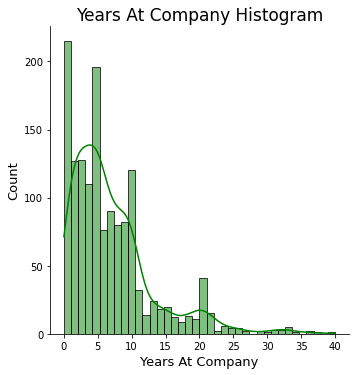

In [53]:
sns.displot(df.YearsAtCompany,color="Green",kde=True)

plt.xlabel("Years At Company",fontsize=13)
plt.ylabel("Count",fontsize=13)
plt.title("Years At Company Histogram",fontsize=17)

plt.show()

- By obsrvation we can say that, a great proportion of values lie between 0 and 10 for Years At Company.

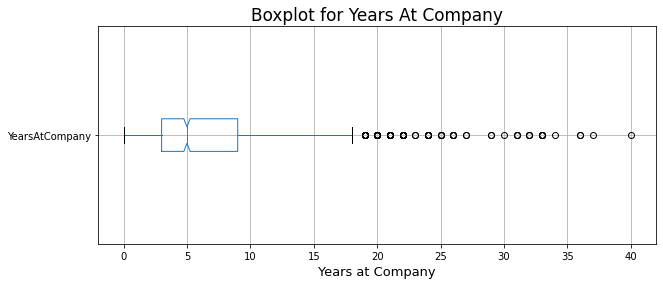

In [54]:
df.boxplot("YearsAtCompany",vert=False,grid=True,notch=True,figsize=(10,4))

plt.xlabel("Years at Company",fontsize=13)
plt.title("Boxplot for Years At Company",fontsize=17)

plt.show()

- By observation we can say that there are outliers present in the given data for Years At Company.

### Years in Current Role tells about the number of years an employee has been working in a current role.

In [55]:
df.YearsInCurrentRole.describe()

count    1470.000000
mean        4.229252
std         3.623137
min         0.000000
25%         2.000000
50%         3.000000
75%         7.000000
max        18.000000
Name: YearsInCurrentRole, dtype: float64

In [56]:
df.YearsInCurrentRole.value_counts()

2     372
0     244
7     222
3     135
4     104
8      89
9      67
1      57
6      37
5      36
10     29
11     22
13     14
14     11
12     10
15      8
16      7
17      4
18      2
Name: YearsInCurrentRole, dtype: int64

In [57]:
df.YearsInCurrentRole.mode()

0    2
dtype: int64

- we can say that maximum value of Years in Current Role is 18 years as per given data. 
- we can say that minimum value of Years in Current Role is 0 years as per given data.
- we can say that 25% employees(roughly 368 employees) have YYears in Current Role less than 2 years as per given data.
- we can say that 25% employees(roughly 368 employees) have Years in Current Role more than 7 years as per given data.
- we can say that 50% employees(735 employees) have Years in Current Role less than 3 years as per given data.
- we can say that 50% employees(735 employees) have Years in Current Role between 2 years and 7 years as per given data.
- we can say that 25% employees(roughly 368 employees) have Years in Current Role between 2 years and 3 years as per given data.
- we can say that 25% employees(roughly 368 employees) have Years in Current Role between 3 years and 7 years as per given data.
- we can say that average Years in Current Role of employees is 4.23 years(approx) as per given data.
- we can say that Years in Current Role data under obervation is positive skewed since mean value is greater than median.
- Since the difference between (Q1 ~ Q2) and (Q2 ~ Q3) is not equal, the given Years in Current Role data is not symmetric.
- Range of Years in Current Role lies between 0 years and 40 years in the given dataset.
- maximum repeating Years in Current Role of employees is 2 years as per given data.

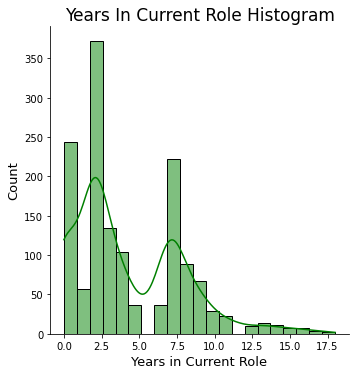

In [58]:
sns.displot(df.YearsInCurrentRole,color="Green",kde=True)

plt.xlabel("Years in Current Role",fontsize=13)
plt.ylabel("Count",fontsize=13)
plt.title("Years In Current Role Histogram",fontsize=17)

plt.show()

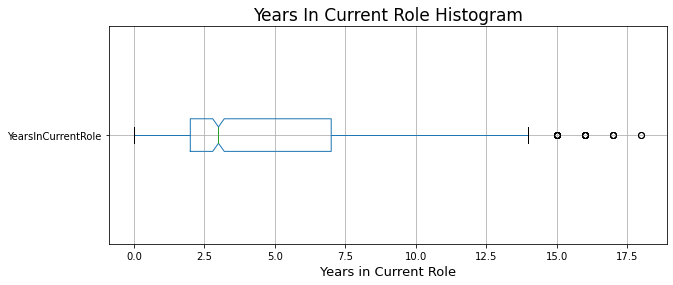

In [59]:
df.boxplot("YearsInCurrentRole",vert=False,notch=True,figsize=(10,4))

plt.xlabel("Years in Current Role",fontsize=13)
plt.title("Years In Current Role Histogram",fontsize=17)

plt.show()

- from observation we can say that data for Years In current Role has outliers in it.

### Years Since Last Promotion refers to the number of years from which an employee has not received any promotion

In [60]:
df.YearsSinceLastPromotion.describe()

count    1470.000000
mean        2.187755
std         3.222430
min         0.000000
25%         0.000000
50%         1.000000
75%         3.000000
max        15.000000
Name: YearsSinceLastPromotion, dtype: float64

In [61]:
df.YearsSinceLastPromotion.value_counts()

0     581
1     357
2     159
7      76
4      61
3      52
5      45
6      32
11     24
8      18
9      17
15     13
13     10
12     10
14      9
10      6
Name: YearsSinceLastPromotion, dtype: int64

- we can say that maximum value of Years Since Last Promotion is 15 years as per given data. 
- we can say that minimum value of Years Since Last Promotion is 0 years as per given data.
- we can say that 25% employees(roughly 368 employees) have Years Since Last Promotion less than 0 years as per given data.
- we can say that 25% employees(roughly 368 employees) have Years Since Last Promotion more than 3 years as per given data.
- we can say that 50% employees(735 employees) have Years Since Last Promotion less than 1 years as per given data.
- we can say that 50% employees(735 employees) have Years Since Last Promotion between 0 years and 3 years as per given data.
- we can say that 25% employees(roughly 368 employees) have Years Since Last Promotion between 0 years and 1 years as per given data.
- we can say that 25% employees(roughly 368 employees) have Years Since Last Promotion between 1 years and 3 years as per given data.
- we can say that average Years Since Last Promotion of employees is 2.19 years(approx) as per given data.
- we can say that Years Since Last Promotion data under obervation is positive skewed since mean value is greater than median.
- Since the difference between (Q1 ~ Q2) and (Q2 ~ Q3) is not equal, the given Years Since Last Promotion data is not symmetric.
- Range of Years Since Last Promotion lies between 0 years and 15 years in the given dataset.
- maximum repeating Years Since Last Promotion of employees is 0 years as per given data.

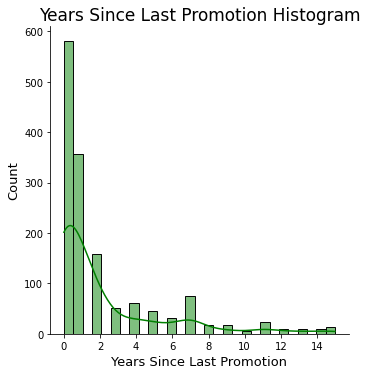

In [62]:
sns.displot(df.YearsSinceLastPromotion,color="Green",kde=True)

plt.xlabel("Years Since Last Promotion",fontsize=13)
plt.ylabel("Count",fontsize=13)
plt.title("Years Since Last Promotion Histogram",fontsize=17)

plt.show()

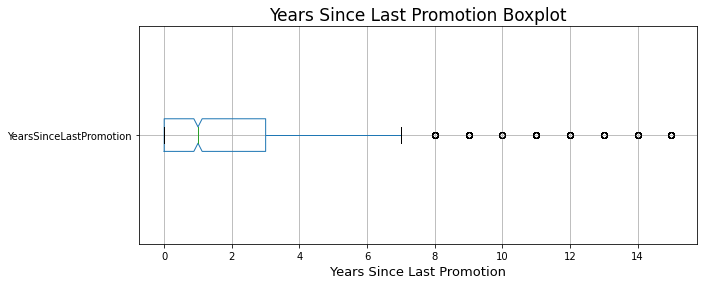

In [63]:
df.boxplot("YearsSinceLastPromotion",vert=False,notch=True,figsize=(10,4))

plt.xlabel("Years Since Last Promotion",fontsize=13)
plt.title("Years Since Last Promotion Boxplot",fontsize=17)

plt.show()

### Years With Current Manager refers to the number of years an employee has worked under same Manager.

In [64]:
df.YearsWithCurrManager.describe()

count    1470.000000
mean        4.123129
std         3.568136
min         0.000000
25%         2.000000
50%         3.000000
75%         7.000000
max        17.000000
Name: YearsWithCurrManager, dtype: float64

In [65]:
df.YearsWithCurrManager.mode()

0    2
dtype: int64

- we can say that maximum value of Years With Current Manager is 17 years as per given data. 
- we can say that minimum value of Years With Current Manager is 0 years as per given data.
- we can say that 25% employees(roughly 368 employees) have Years With Current Manager less than 2 years as per given data.
- we can say that 25% employees(roughly 368 employees) have Years With Current Manager more than 7 years as per given data.
- we can say that 50% employees(735 employees) have Years With Current Manager less than 3 years as per given data.
- we can say that 50% employees(735 employees) have Years With Current Manager between 2 years and 7 years as per given data.
- we can say that 25% employees(roughly 368 employees) have Years With Current Manager between 2 years and 3 years as per given data.
- we can say that 25% employees(roughly 368 employees) have Years With Current Manager between 3 years and 7 years as per given data.
- we can say that average Years Since Last Promotion of employees is 4.13 years(approx) as per given data.
- we can say that Years Since Last Promotion data under obervation is positive skewed since mean value is greater than median.
- Since the difference between (Q1 ~ Q2) and (Q2 ~ Q3) is not equal, the given Years Since Last Promotion data is not symmetric.
- Range of Years Since Last Promotion lies between 0 years and 17 years in the given dataset.
- maximum repeating Years Since Last Promotion of employees is 2 years as per given data.

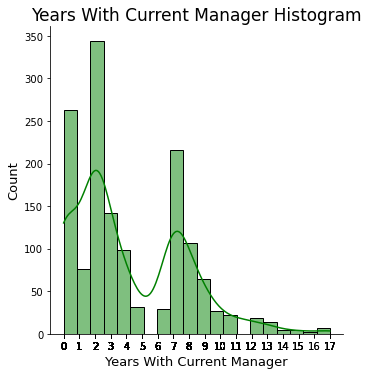

In [66]:
sns.displot(df.YearsWithCurrManager,color="Green",kde=True,bins=20)

plt.xticks(df.YearsWithCurrManager)
plt.xlabel("Years With Current Manager",fontsize=13)
plt.ylabel("Count",fontsize=13)
plt.title("Years With Current Manager Histogram",fontsize=17)

plt.show()

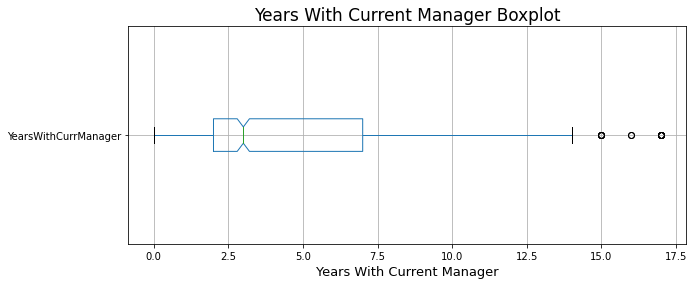

In [67]:
df.boxplot("YearsWithCurrManager",vert=False,notch=True,figsize=(10,4))

plt.xlabel("Years With Current Manager",fontsize=13)
plt.title("Years With Current Manager Boxplot",fontsize=17)

plt.show()

### Distance From Home defines the distance between the office and the location where employee lives.

In [68]:
df.DistanceFromHome.describe()

count    1470.000000
mean        9.192517
std         8.106864
min         1.000000
25%         2.000000
50%         7.000000
75%        14.000000
max        29.000000
Name: DistanceFromHome, dtype: float64

In [69]:
df.DistanceFromHome.mode()

0    2
dtype: int64

In [70]:
df.DistanceFromHome.value_counts()

2     211
1     208
10     86
9      85
3      84
7      84
8      80
5      65
4      64
6      59
16     32
11     29
24     28
23     27
29     27
15     26
18     26
26     25
25     25
20     25
28     23
19     22
14     21
12     20
17     20
22     19
13     19
21     18
27     12
Name: DistanceFromHome, dtype: int64

- we can say that maximum value of Distance From Home is 29 km as per given data. 
- we can say that minimum value of Distance From Home is 1 km as per given data.
- we can say that 25% employees(roughly 368 employees) have Distance From Home less than 2 km as per given data.
- we can say that 25% employees(roughly 368 employees) have Distance From Home more than 14 km as per given data.
- we can say that 50% employees(735 employees) have Distance From Home less than 7 km as per given data.
- we can say that 50% employees(735 employees) have Distance From Home between 2 km and 14 km as per given data.
- we can say that 25% employees(roughly 368 employees) have Distance From Home between 2 km and 7 km as per given data.
- we can say that 25% employees(roughly 368 employees) have Distance From Home between 7 km and 14 km as per given data.
- we can say that average Distance From Home of employees is 9.2 km(approx) as per given data.
- we can say that Distance From Home data under obervation is positive skewed since mean value is greater than median.
- Since the difference between (Q1 ~ Q2) and (Q2 ~ Q3) is not equal, the given Years Since Last Promotion data is not symmetric.
- Range of Distance From Home lies between 1 km and 29 km in the given dataset.
- maximum repeating Distance From Home of employees is 2 km as per given data.

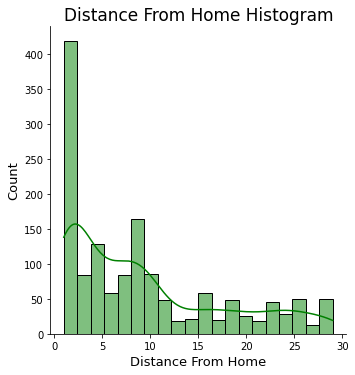

In [71]:
sns.displot(df.DistanceFromHome,color="Green",kde=True,bins=20)

plt.xlabel("Distance From Home",fontsize=13)
plt.ylabel("Count",fontsize=13)
plt.title("Distance From Home Histogram",fontsize=17)

plt.show()

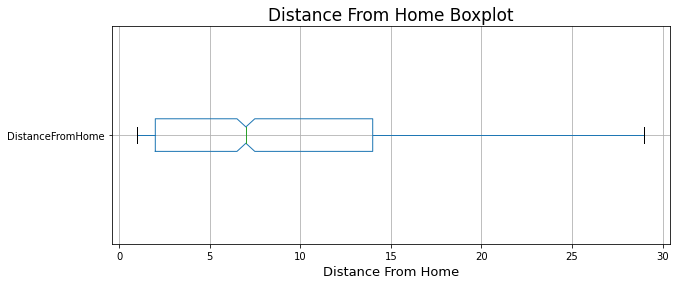

In [72]:
df.boxplot("DistanceFromHome",vert=False,notch=True,figsize=(10,4))

plt.xlabel("Distance From Home",fontsize=13)
plt.title("Distance From Home Boxplot",fontsize=17)

plt.show()

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

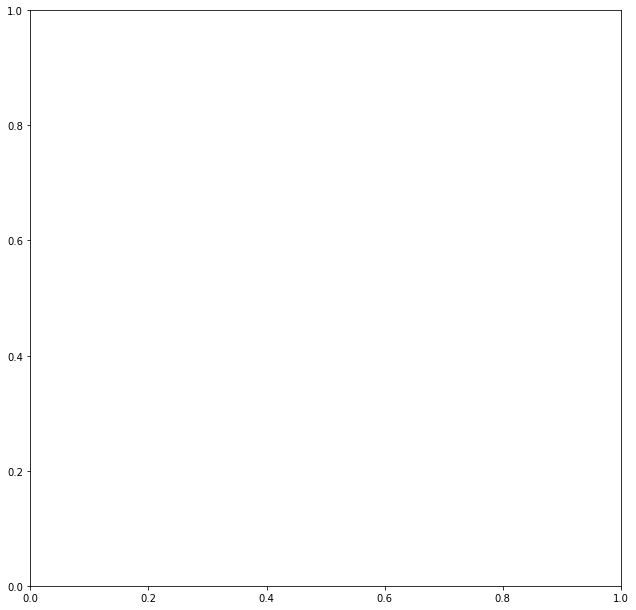

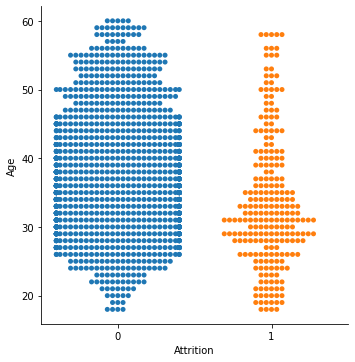

In [107]:
# Plotting how every  numerical feature correlate with the "target"

column_num=df[['Age', 'MonthlyIncome','TotalWorkingYears', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager','DistanceFromHome']]

plt.figure(figsize=(36,36), facecolor='white')
plotnumber = 1

for column in column_num:
    if plotnumber<=16 :
        ax = plt.subplot(3,3,plotnumber)
        sns.catplot(x="Attrition", y=column_num[column], kind="swarm", data=df)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Attrition',fontsize=20)
    plotnumber+=1
plt.tight_layout()

### Converting categorical features to numerical to improve model interpretability.

In [73]:
df.head()

,Age,Attrition,BusinessTravel,Department,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobSatisfaction,MaritalStatus,MonthlyIncome,OverTime,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,DistanceFromHome
0,41,1,Travel_Rarely,Sales,Life Sciences,2,Female,3,2,4,Single,5993,Yes,8,1,6,4,0,5,1
1,49,0,Travel_Frequently,Research & Development,Life Sciences,3,Male,2,2,2,Married,5130,No,10,3,10,7,1,7,8
2,37,1,Travel_Rarely,Research & Development,Other,4,Male,2,1,3,Single,2090,Yes,7,3,0,0,0,0,2
3,33,0,Travel_Frequently,Research & Development,Life Sciences,4,Female,3,1,3,Married,2909,Yes,8,3,8,7,3,0,3
4,27,0,Travel_Rarely,Research & Development,Medical,1,Male,3,1,2,Married,3468,No,6,3,2,2,2,2,2


In [74]:
''' preprocessing of dataset '''

BusinessTravel_label = {value: key for key, value in enumerate(df['BusinessTravel'].unique())}
df['BusinessTravel'] = df['BusinessTravel'].map(BusinessTravel_label)

Department_label = {value: key for key, value in enumerate(df['Department'].unique())}
df['Department'] = df['Department'].map(Department_label)

EducationField_label = {value: key for key, value in enumerate(df['EducationField'].unique())}
df['EducationField'] = df['EducationField'].map(EducationField_label)

Gender_label = {value: key for key, value in enumerate(df['Gender'].unique())}
df['Gender'] = df['Gender'].map(Gender_label)

MaritalStatus_label = {value: key for key, value in enumerate(df['MaritalStatus'].unique())}
df['MaritalStatus'] = df['MaritalStatus'].map(MaritalStatus_label)

OverTime_label = {value: key for key, value in enumerate(df['OverTime'].unique())}
df['OverTime'] = df['OverTime'].map(OverTime_label)

In [86]:
''' after preprocessing data'''
df.head()

,Age,Attrition,BusinessTravel,Department,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobSatisfaction,MaritalStatus,MonthlyIncome,OverTime,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,DistanceFromHome
0,41,1,0,0,0,2,0,3,2,4,0,5993,0,8,1,6,4,0,5,1
1,49,0,1,1,0,3,1,2,2,2,1,5130,1,10,3,10,7,1,7,8
2,37,1,0,1,1,4,1,2,1,3,0,2090,0,7,3,0,0,0,0,2
3,33,0,1,1,0,4,0,3,1,3,1,2909,0,8,3,8,7,3,0,3
4,27,0,0,1,2,1,1,3,1,2,1,3468,1,6,3,2,2,2,2,2


## Bivariate and Multivariate Analysis

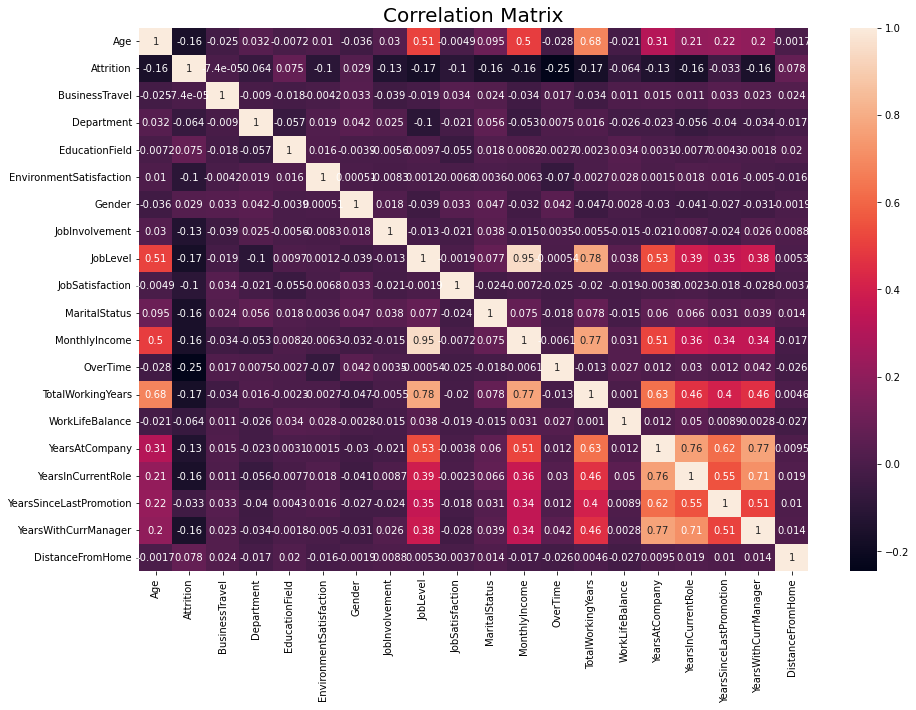

In [76]:
''' correlation matrix '''
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True);
plt.title('Correlation Matrix', fontsize=20);

In [77]:
''' checking correlation of STATUS w.r.t other features '''
df.corr()['Attrition'].sort_values(ascending=False)[1:]

DistanceFromHome           0.077924
EducationField             0.075437
Gender                     0.029453
BusinessTravel            -0.000074
YearsSinceLastPromotion   -0.033019
WorkLifeBalance           -0.063939
Department                -0.063991
EnvironmentSatisfaction   -0.103369
JobSatisfaction           -0.103481
JobInvolvement            -0.130016
YearsAtCompany            -0.134392
YearsWithCurrManager      -0.156199
Age                       -0.159205
MonthlyIncome             -0.159840
YearsInCurrentRole        -0.160545
MaritalStatus             -0.162070
JobLevel                  -0.169105
TotalWorkingYears         -0.171063
OverTime                  -0.246118
Name: Attrition, dtype: float64

In [78]:
df.head()

,Age,Attrition,BusinessTravel,Department,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobSatisfaction,MaritalStatus,MonthlyIncome,OverTime,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,DistanceFromHome
0,41,1,0,0,0,2,0,3,2,4,0,5993,0,8,1,6,4,0,5,1
1,49,0,1,1,0,3,1,2,2,2,1,5130,1,10,3,10,7,1,7,8
2,37,1,0,1,1,4,1,2,1,3,0,2090,0,7,3,0,0,0,0,2
3,33,0,1,1,0,4,0,3,1,3,1,2909,0,8,3,8,7,3,0,3
4,27,0,0,1,2,1,1,3,1,2,1,3468,1,6,3,2,2,2,2,2


In [79]:
'''importing libraries'''
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report



In [80]:
''' train, test, evaluation function '''

def result(X, y, ts, rs, model):
    
    ''' train test split '''
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=ts, random_state=rs)
    
    ''' scaling '''
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    
    ''' fit on data '''
    model.fit(X_train, y_train)
    
    ''' prediction '''
    pred = model.predict(X_test)
    
    ''' performance of model '''
    print("Classification Report: \n", classification_report(y_test, pred))
    print("-" * 100)
    print()
    
    print("Accuracy Score: ", accuracy_score(y_test, pred))
    print("-" * 100)
    print()
    
    print("Confusion Matrix: ")
    plt.figure(figsize=(10, 5))
    sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt='g');
    plt.title('Confusion Matrix', fontsize=20)

In [82]:
''' defining independent(predictor) and dependent(target) feature '''
X = df[['Age','BusinessTravel', 'Department', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'OverTime',
       'TotalWorkingYears', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'DistanceFromHome']]
y = df[['Attrition']]

Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.97      0.92       310
           1       0.66      0.33      0.44        58

    accuracy                           0.87       368
   macro avg       0.77      0.65      0.68       368
weighted avg       0.85      0.87      0.85       368

----------------------------------------------------------------------------------------------------

Accuracy Score:  0.8668478260869565
----------------------------------------------------------------------------------------------------

Confusion Matrix: 


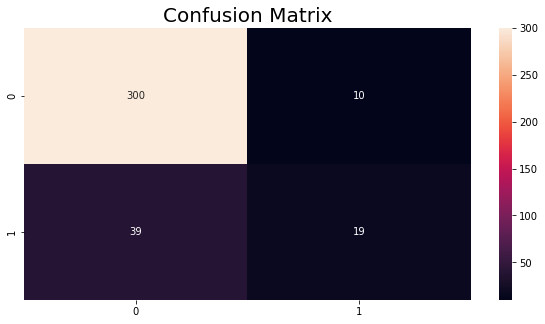

In [83]:
''' Logistic Regression '''
model = LogisticRegression()
result(X, y, 0.25, 0, model)

Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.97      0.92       320
           1       0.40      0.12      0.19        48

    accuracy                           0.86       368
   macro avg       0.64      0.55      0.56       368
weighted avg       0.82      0.86      0.83       368

----------------------------------------------------------------------------------------------------

Accuracy Score:  0.8614130434782609
----------------------------------------------------------------------------------------------------

Confusion Matrix: 


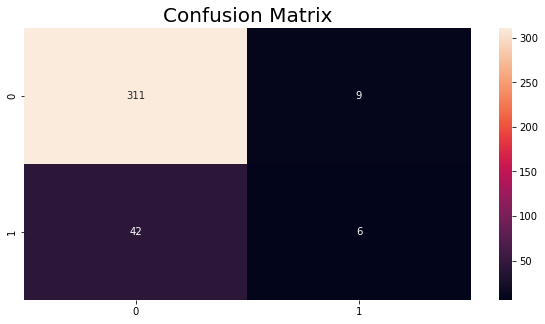

In [84]:
''' RandomForest Classifier '''
rf = RandomForestClassifier()
result(X, y, 0.25, 42, rf)

Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.98      0.92       371
           1       0.63      0.17      0.27        70

    accuracy                           0.85       441
   macro avg       0.75      0.58      0.59       441
weighted avg       0.83      0.85      0.82       441

----------------------------------------------------------------------------------------------------

Accuracy Score:  0.8526077097505669
----------------------------------------------------------------------------------------------------

Confusion Matrix: 


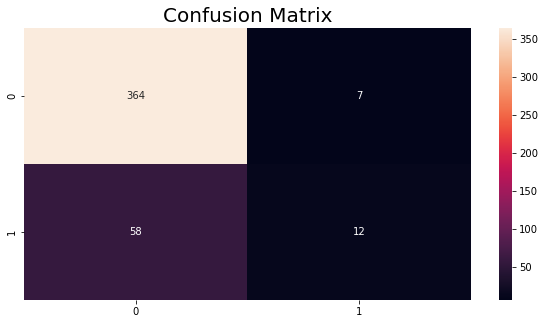

In [85]:
''' KNN '''
knn = KNeighborsClassifier()
result(X, y, 0.3, 25, knn)